<a href="https://colab.research.google.com/github/viniciusrpb/visualanalysis_ppgi/blob/master/analysis_ppgi_presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
!pip install plotly>=4.7.1
!dpkg --configure -a
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

/usr/local/bin/orca: Text file busy
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgtk2.0-0 is already the newest version (2.24.32-1ubuntu1).
libgconf-2-4 is already the newest version (3.2.6-4ubuntu1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.4).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


## Carrega CSV para um dataframe

In [69]:
df = pd.read_csv('hist_ppgi.csv', sep=';',encoding='latin-1')

## Remover as disciplinas que não são relevantes no PPGI

In [70]:
flag_ppgi = df['Código da Disciplina'] >= 316000

flag_ppgi2 = df['Código da Disciplina'] < 317000

df = df[flag_ppgi & flag_ppgi2]

### Estimar o ano e semestre de ingresso do doutorando(a) com base no número de matrícula

In [71]:
matricula = df['Matrícula']

periodo = df['Período']

matdisano = periodo // 10

matdissem = periodo % 10

semestre = (matricula // 100000)%10+1

ingresso = 2000+(matricula // 10000000)

#df['Ingresso'] = ingresso*10+semestre

df['Tempo'] = (matdisano - ingresso)*2 + matdissem-semestre+1

## Remove atributos irrelevantes e confidenciais

In [72]:
df = df.drop(['Nome','Curso','Código do Curso','Modalidade','Turma','Código da Opção','Nível'], axis=1)

nroInstances,nroAttributes = df.shape

df.head()

,Período,Matrícula,Código da Disciplina,Disciplina,Menção,Tempo
0,20102,100000541,316261,Tópicos em Engenharia de Software ...,SS,2
1,20102,100000541,316440,Sistemas Distribuídos ...,MS,2
2,20102,100132855,316032,Inteligência Artificial 2 ...,SS,1
3,20102,100132855,316504,Tópicos em Fundamentos e Métodos de Computação...,MS,1
4,20102,100132871,316296,Teoria da Computação ...,MM,1


## Erros de preenchimento ou registro no SIGPOS: número de matrícula do doutorando mais recente em relação ao período de matrícula da disciplina

In [73]:
flag_tempo = df['Tempo'] < 0

erros = df[flag_tempo]

erros.head()

,Período,Matrícula,Código da Disciplina,Disciplina,Menção,Tempo
11,20102,120048582,316415,Seminário ...,SS,-2
12,20102,120048582,316504,Tópicos em Fundamentos e Métodos de Computação...,MS,-2
13,20102,120048582,316547,Proficiência em Inglês ...,AP,-2
14,20102,120099551,316032,Inteligência Artificial 2 ...,MM,-2
15,20102,120099551,316296,Teoria da Computação ...,MS,-2


### Matrículas em todas as disciplinas do PPGI

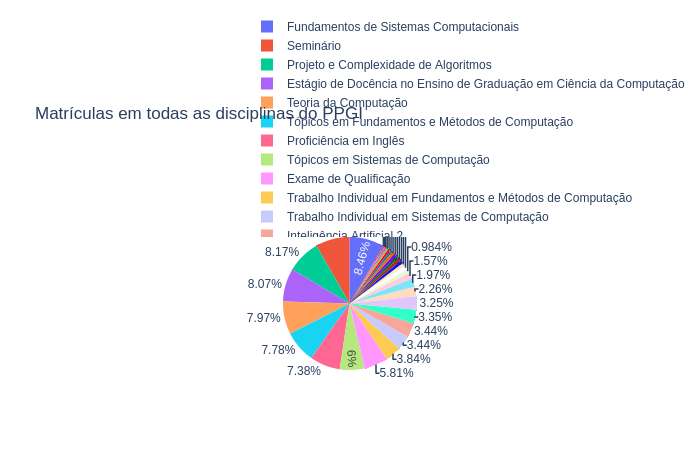

In [91]:
disciplinas = df.groupby(['Disciplina', 'Código da Disciplina']).size()

import plotly.io as pio
pio.renderers.default = 'png' 

fig = px.pie(df, names='Disciplina', title='Matrículas em todas as disciplinas do PPGI')
fig.update_layout(width=4000,height=4000,legend=dict(yanchor="bottom"))
fig.show()


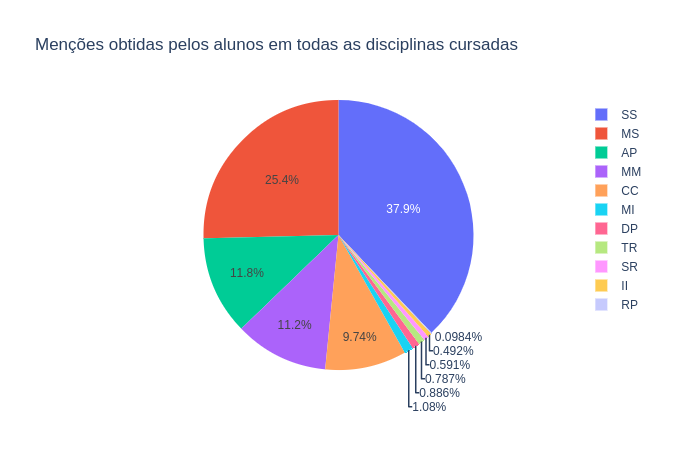

In [29]:
fig = px.pie(df, names='Menção', title='Menções obtidas pelos alunos em todas as disciplinas cursadas')
fig.show()

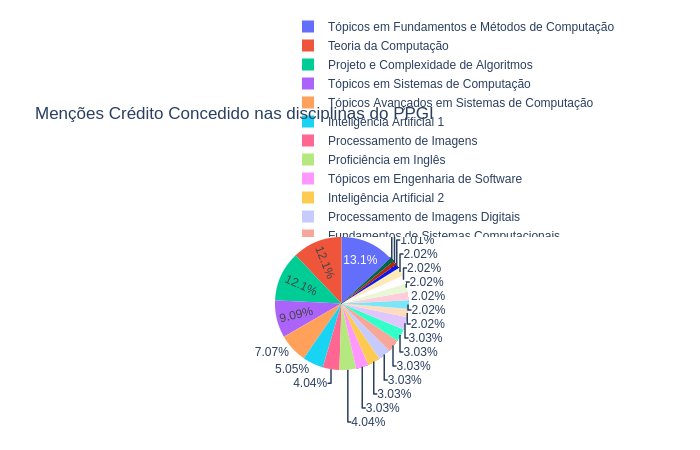

In [92]:
fig = px.pie(df[df.Menção == 'CC'], names='Disciplina', title='Menções Crédito Concedido nas disciplinas do PPGI')
fig.update_layout(width=4000,height=4000,legend=dict(yanchor="bottom"))
fig.show()

## Análise das matrículas resultantes em reprovações e desistências

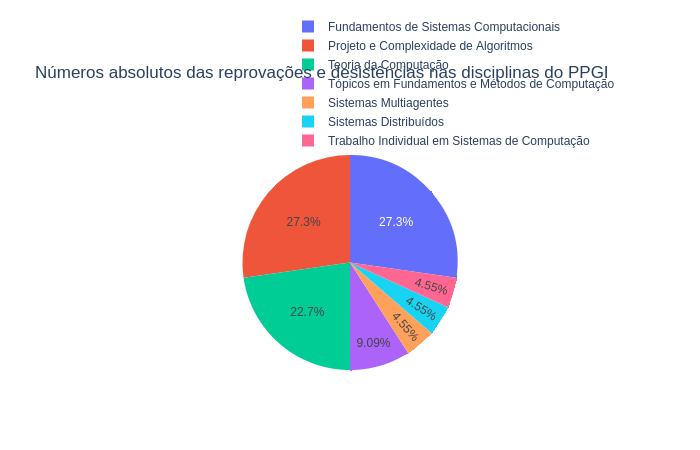

In [93]:
mi = df['Menção'] == "MI"

ii = df['Menção'] == "II"

sr = df['Menção'] == "SR"

dfrep = df[mi | ii | sr ]

fig = px.pie(dfrep, names='Disciplina', title='Números absolutos das reprovações e desistências nas disciplinas do PPGI')
fig.update_layout(width=4000,height=4000,legend=dict(yanchor="bottom"))
fig.show()

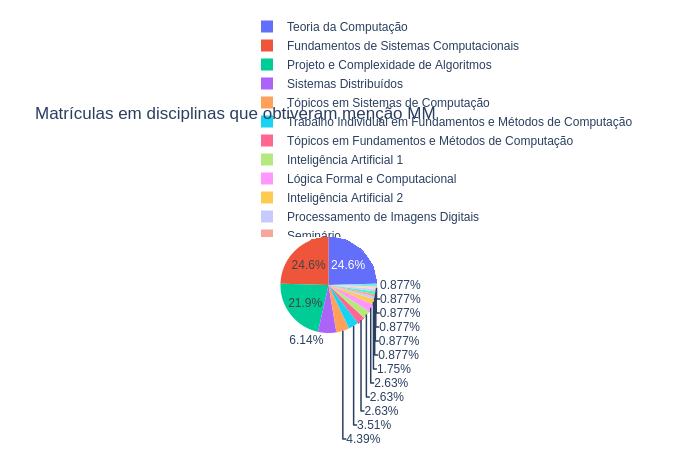

In [94]:
fig = px.pie(df[df.Menção == 'MM'], names='Disciplina', title='Matrículas em disciplinas que obtiveram menção MM')
fig.update_layout(width=4000,height=4000,legend=dict(yanchor="bottom"))
fig.show()

## Menções dos exames de qualificação

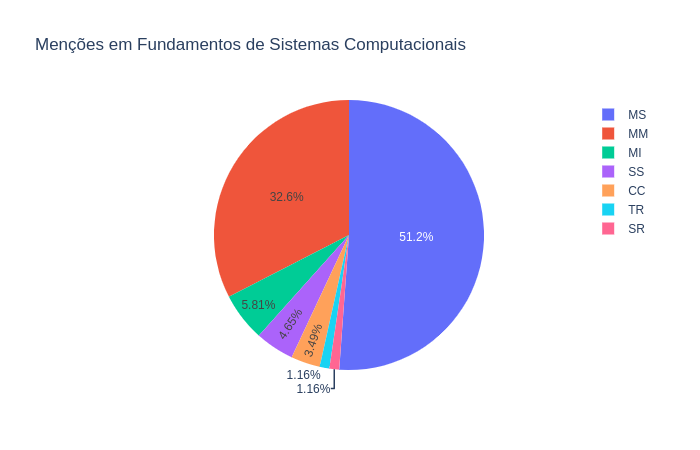

In [13]:
fig = px.pie(df[df['Código da Disciplina'] == 316377], names='Menção', title='Menções em Fundamentos de Sistemas Computacionais')
fig.show()

## Menções em Projeto e Complexidade de Algoritmos

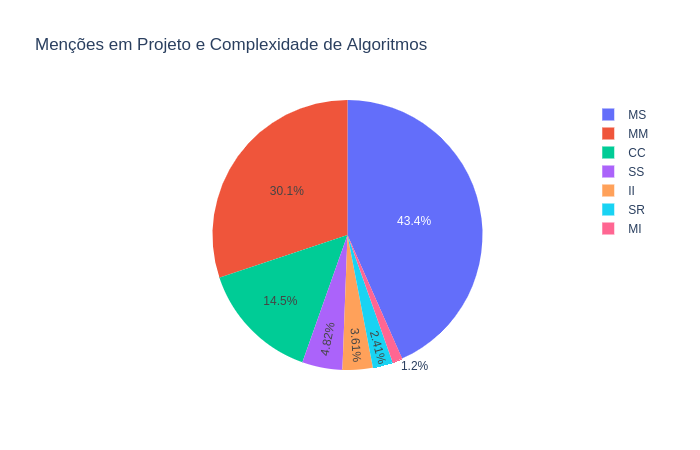

In [14]:
fig = px.pie(df[df['Código da Disciplina'] == 316393], names='Menção', title='Menções em Projeto e Complexidade de Algoritmos')
fig.show()

## Menções em Teoria da Computação

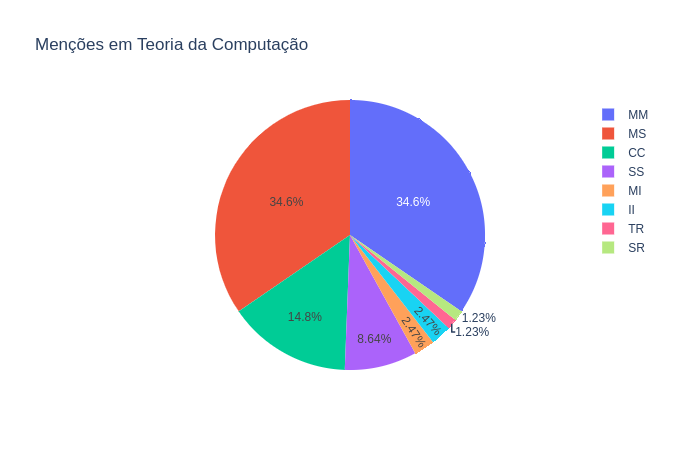

In [15]:
fig = px.pie(df[df['Código da Disciplina'] == 316296], names='Menção', title='Menções em Teoria da Computação')
fig.show()

## Menções dos exames de qualificação

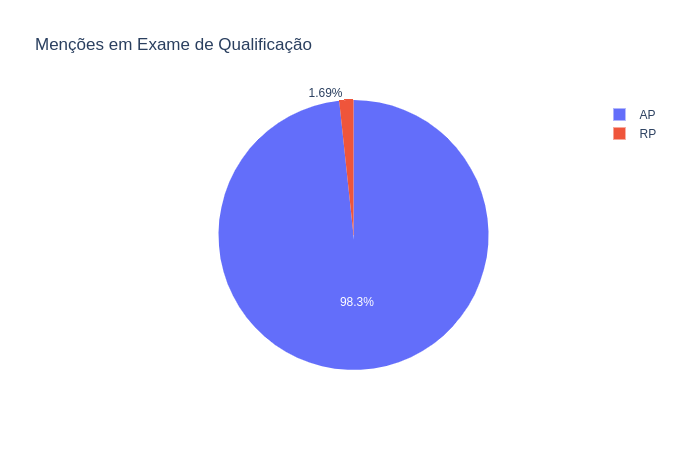

In [16]:
fig = px.pie(df[df['Código da Disciplina'] == 316580], names='Menção', title='Menções em Exame de Qualificação')
fig.show()

## Quantos semestres cada aluno leva para concluir o exame de qualificação?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



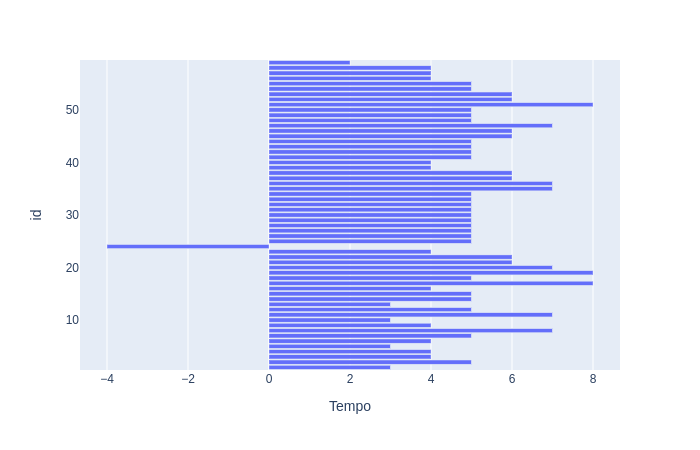

In [17]:
quali = df[df['Código da Disciplina'] == 316580]

#ferro = quali[quali['Matrícula'] == 180061712]

#ferro
tempoQualificar = quali[['Matrícula','Tempo']]

#print()
tempoQualificar['id'] = np.arange(len(tempoQualificar)) + 1

fig = px.bar(tempoQualificar, x="Tempo", y="id", orientation='h')
fig.show()



## Disciplinas cursadas com maior quantidade de matrículas

In [18]:
propdf = df;

propdf = propdf.drop(['Código da Disciplina'], axis=1)

propdf = propdf[propdf.Menção != 'AP']

propdf = propdf[propdf.Menção != 'CC']

propdf = propdf[propdf.Menção != 'DP']

propdf = propdf[propdf.Menção != 'RP']

totalDisc = propdf.groupby(['Disciplina']).size()

#print(totalDisc)

### Drop course's name attribute (we refer them by their own IDs)

In [19]:
precdf = df

precdf = precdf[precdf.Menção != 'AP']

precdf = precdf[precdf.Menção != 'CC']

precdf = precdf[precdf.Menção != 'DP']

precdf = precdf[precdf.Menção != 'RP']

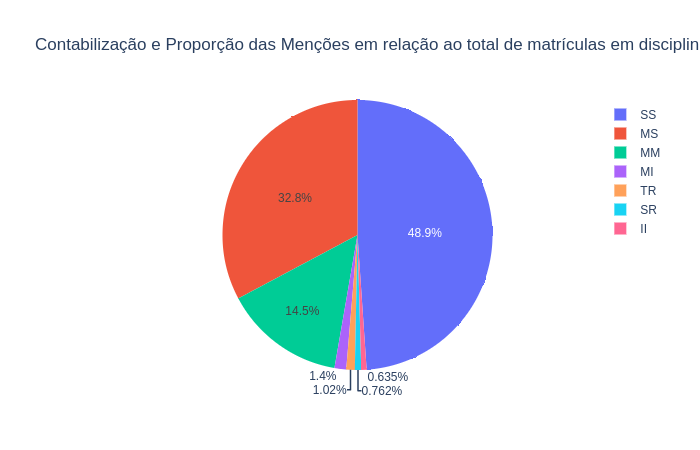

In [20]:
mencoes = precdf.groupby(['Menção']).size()

fig = px.pie(precdf, names='Menção', title='Contabilização e Proporção das Menções em relação ao total de matrículas em disciplinas')
fig.show()

## Transformando atributos categóricos para numéricos ordinais (menção)

In [21]:
precdf = precdf.rename(columns={'Período':'periodo', 'Código da Disciplina': 'codigo_disciplina','Menção' : 'mencao'})

precdf['mencao'] = precdf['mencao'].astype('category')

cat_columns = precdf.select_dtypes(['category']).columns

precdf[cat_columns] = precdf[cat_columns].apply(lambda x: x.cat.codes)

#print(precdf)

#print(cat_columns)

### Visualization based on Parallel Coordinates

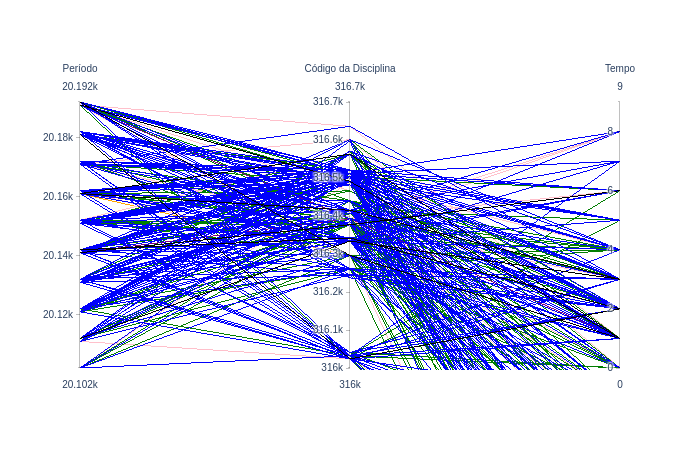

In [22]:
fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = precdf['mencao'],
                     colorscale=["orange","red","pink","green","purple","blue","black"]),
        dimensions = list([
            dict(range = [20102,20192],
                label = 'Período', values = precdf['periodo']),
            dict(range = [316000,316700],
                label = 'Código da Disciplina', values = precdf['codigo_disciplina']),
            dict(range = [0,9],
                label = 'Tempo', values = precdf['Tempo'])
        ])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)
fig.show()


In [23]:
#temp = df.groupby('Matrícula')

#temp.describe().head()

#temp = temp.count()#temp[['count']]

#alunos = temp[['Menção']]

#alunos

In [24]:
#pd.get_dummies(df, prefix=['Código da Disciplina'])
#mencoes = precdf.groupby(['mencao']).size()

#print(mencoes)

#mencoes = df.groupby(['Menção']).size()

#print(mencoes)

In [25]:
#coursesArray = pd.unique(df['Disciplina'].values)
#courses = coursesArray.tolist()

#discNames = {}

#invdict = {}
#for i in range(0,len(courses)):
#    discNames[i] = courses[i]
#    invdict[courses[i]] = i

#print(discNomes)

#codesArray = pd.unique(df['Código da Disciplina'].values)
#codes = codesArray.tolist()

#discCodes = {}

#invdict2 = {}
#for i in range(0,len(codes)):
#    discCodes[i] = codes[i]
#    invdict2[codes[i]] = i


#for i in range(0,len(courses)):
#    print(str(discCodes[i])+' '+str(discNames[i]))

#prop = propdf.groupby(['Disciplina','Menção']).size() / propdf.groupby(['Disciplina']).size()

#print(prop)